
Executing all RIB waveguide analysis tasks...
🔬 TASK 1: Analyzing wavelength dependence...
✅ Wavelength analysis completed
📊 TASK 2: Plotting wavelength trends...


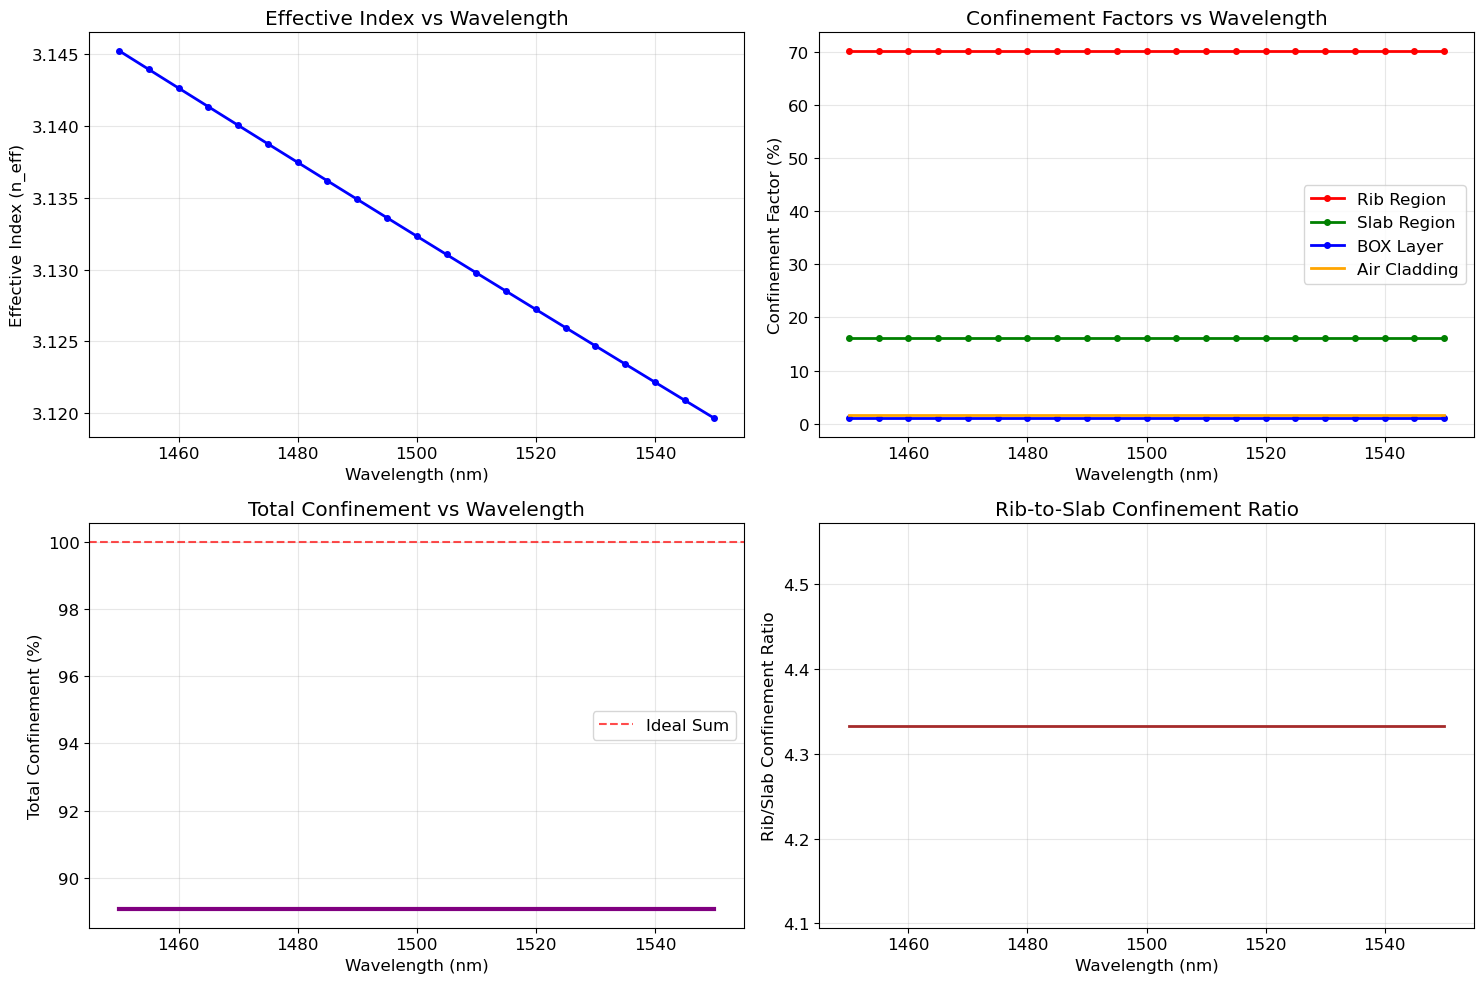

✅ Wavelength trends plotted
⚡ TASK 3: Plotting electric field profiles...


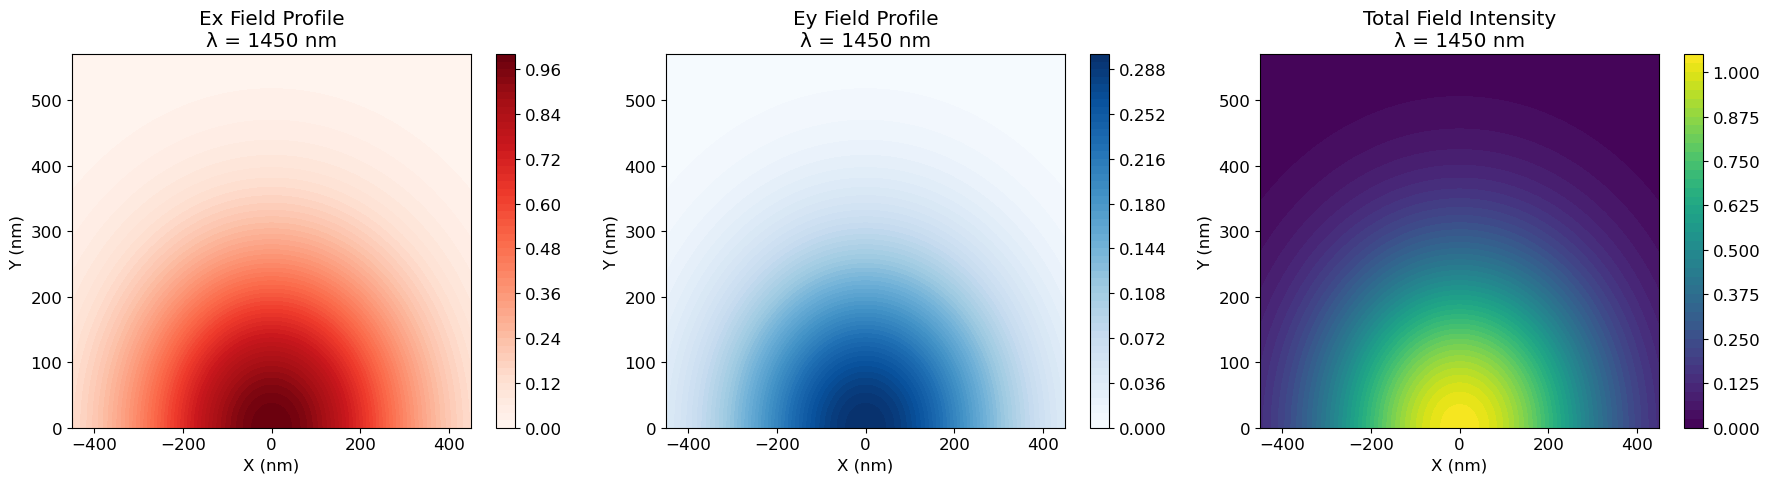

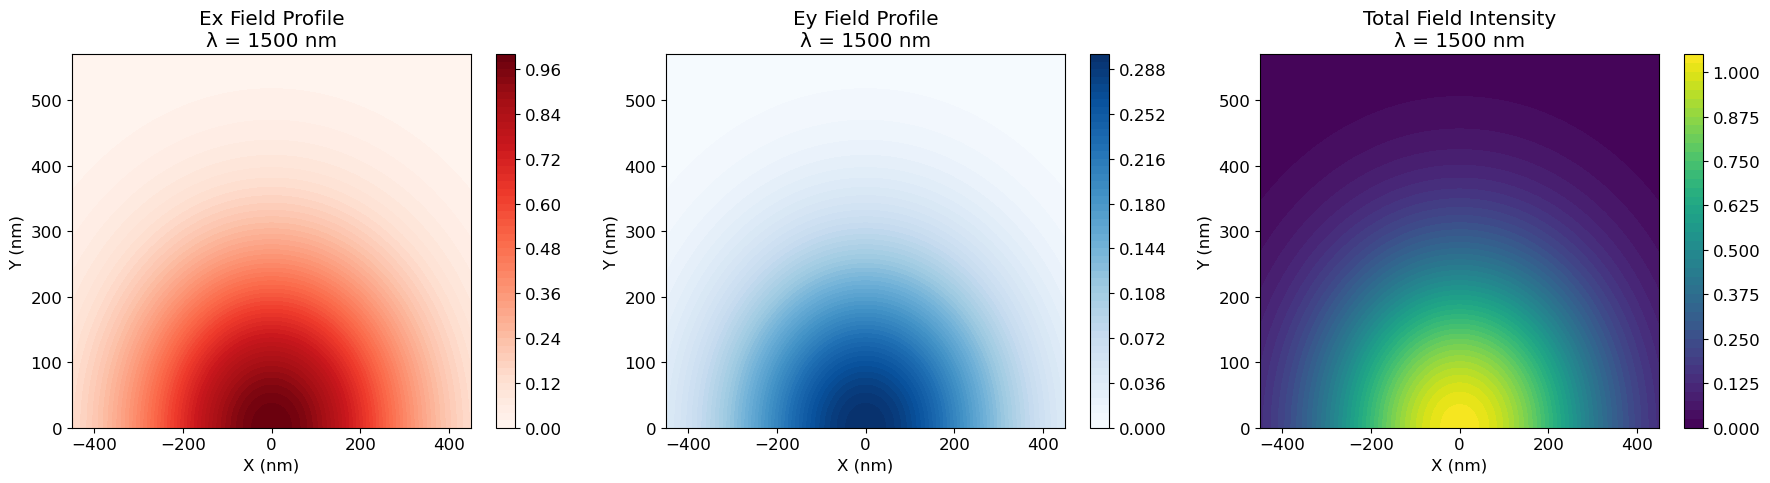

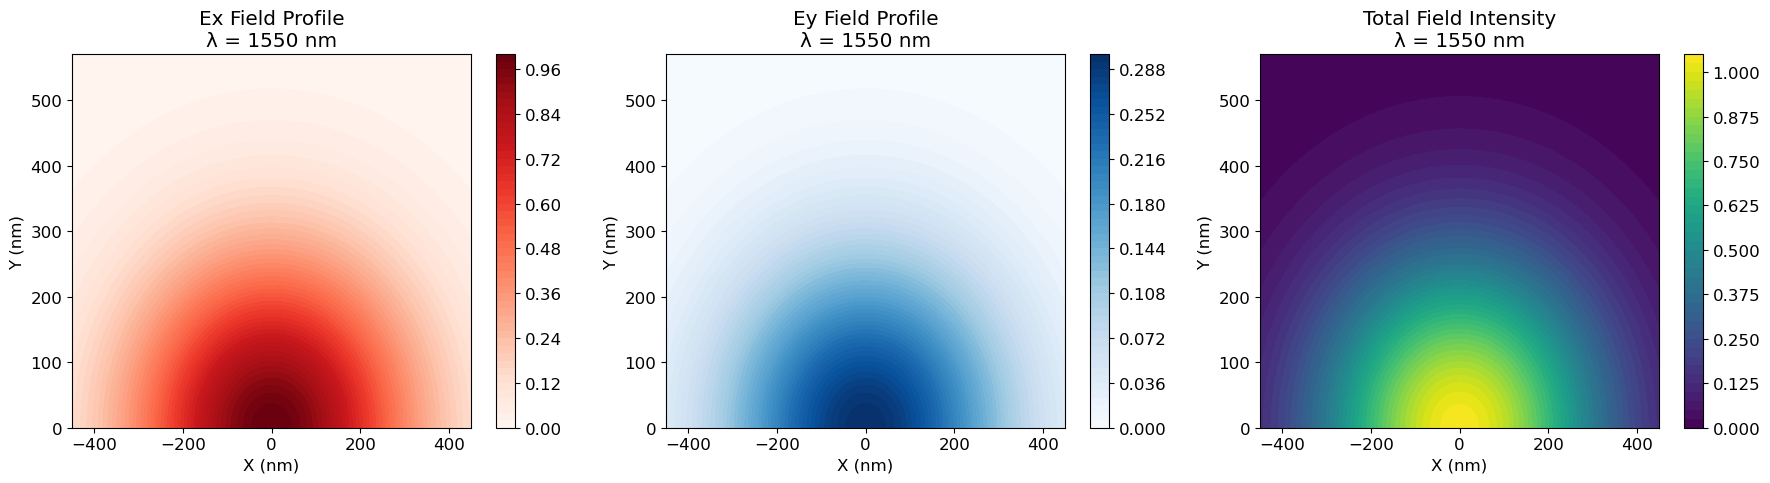

✅ Electric field profiles plotted
📏 TASK 5: Analyzing rib height dependence...
✅ Height dependence analysis completed
📈 TASK 5: Plotting height dependence...


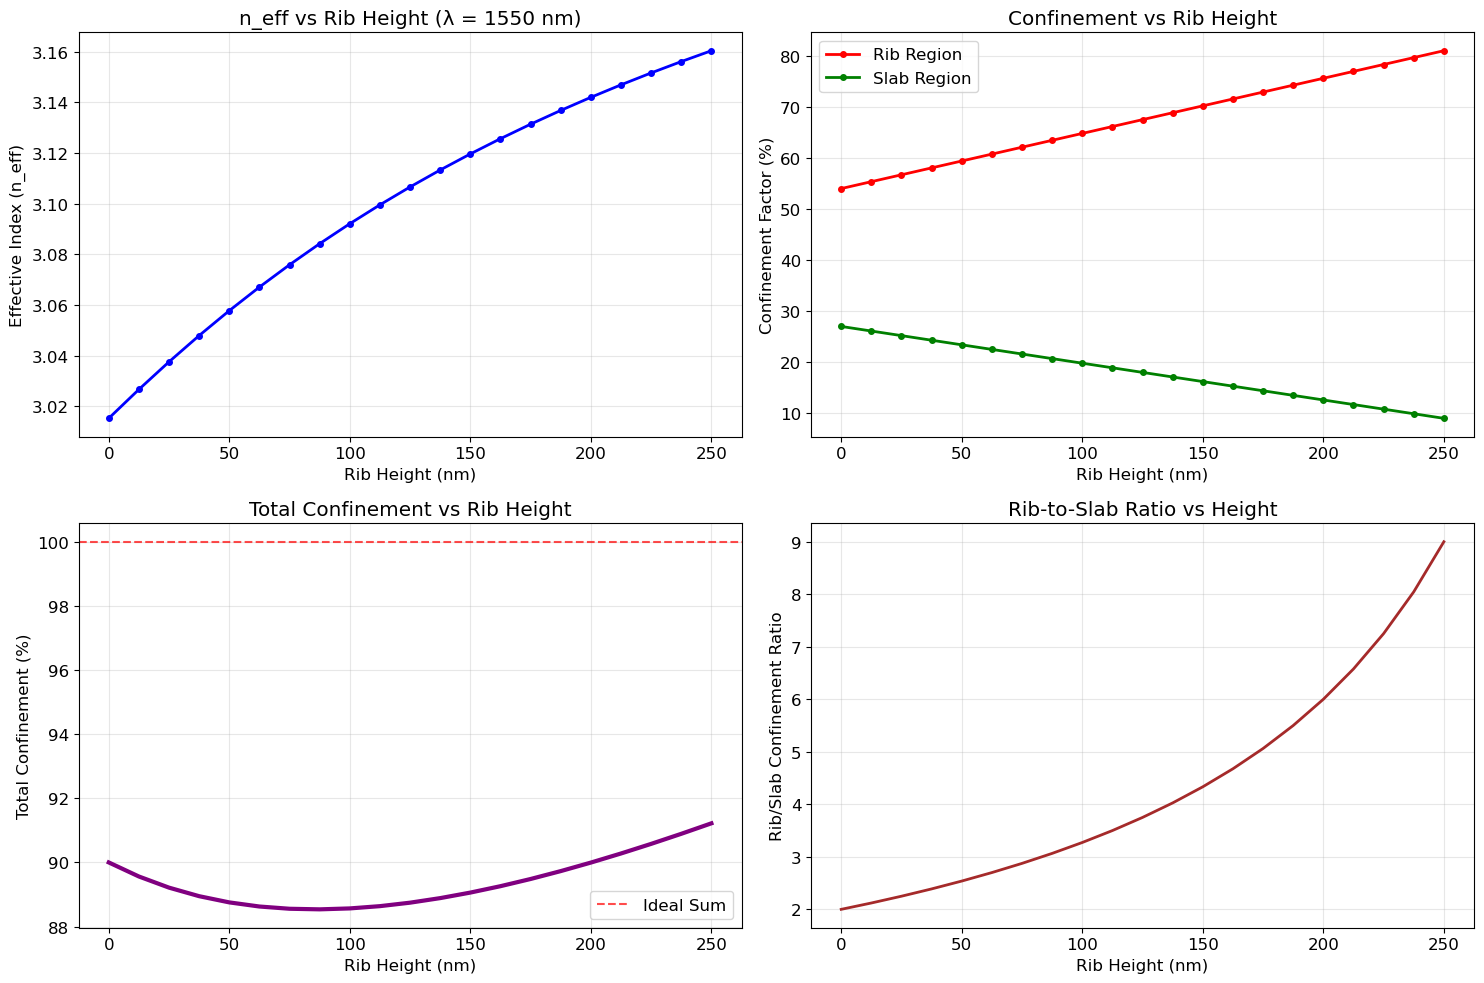

✅ Height dependence plots saved
✅ TASK 6: Verifying confinement sum...


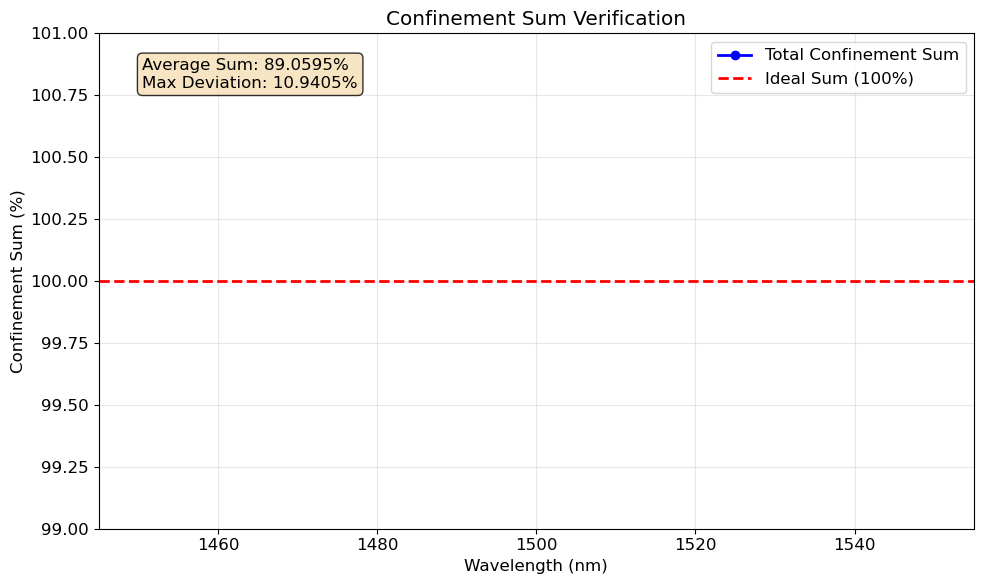

✓ Average confinement sum: 89.0595%
✓ Maximum deviation from 100%: 10.9405%
🎯 TASK 8: Generating research analysis...


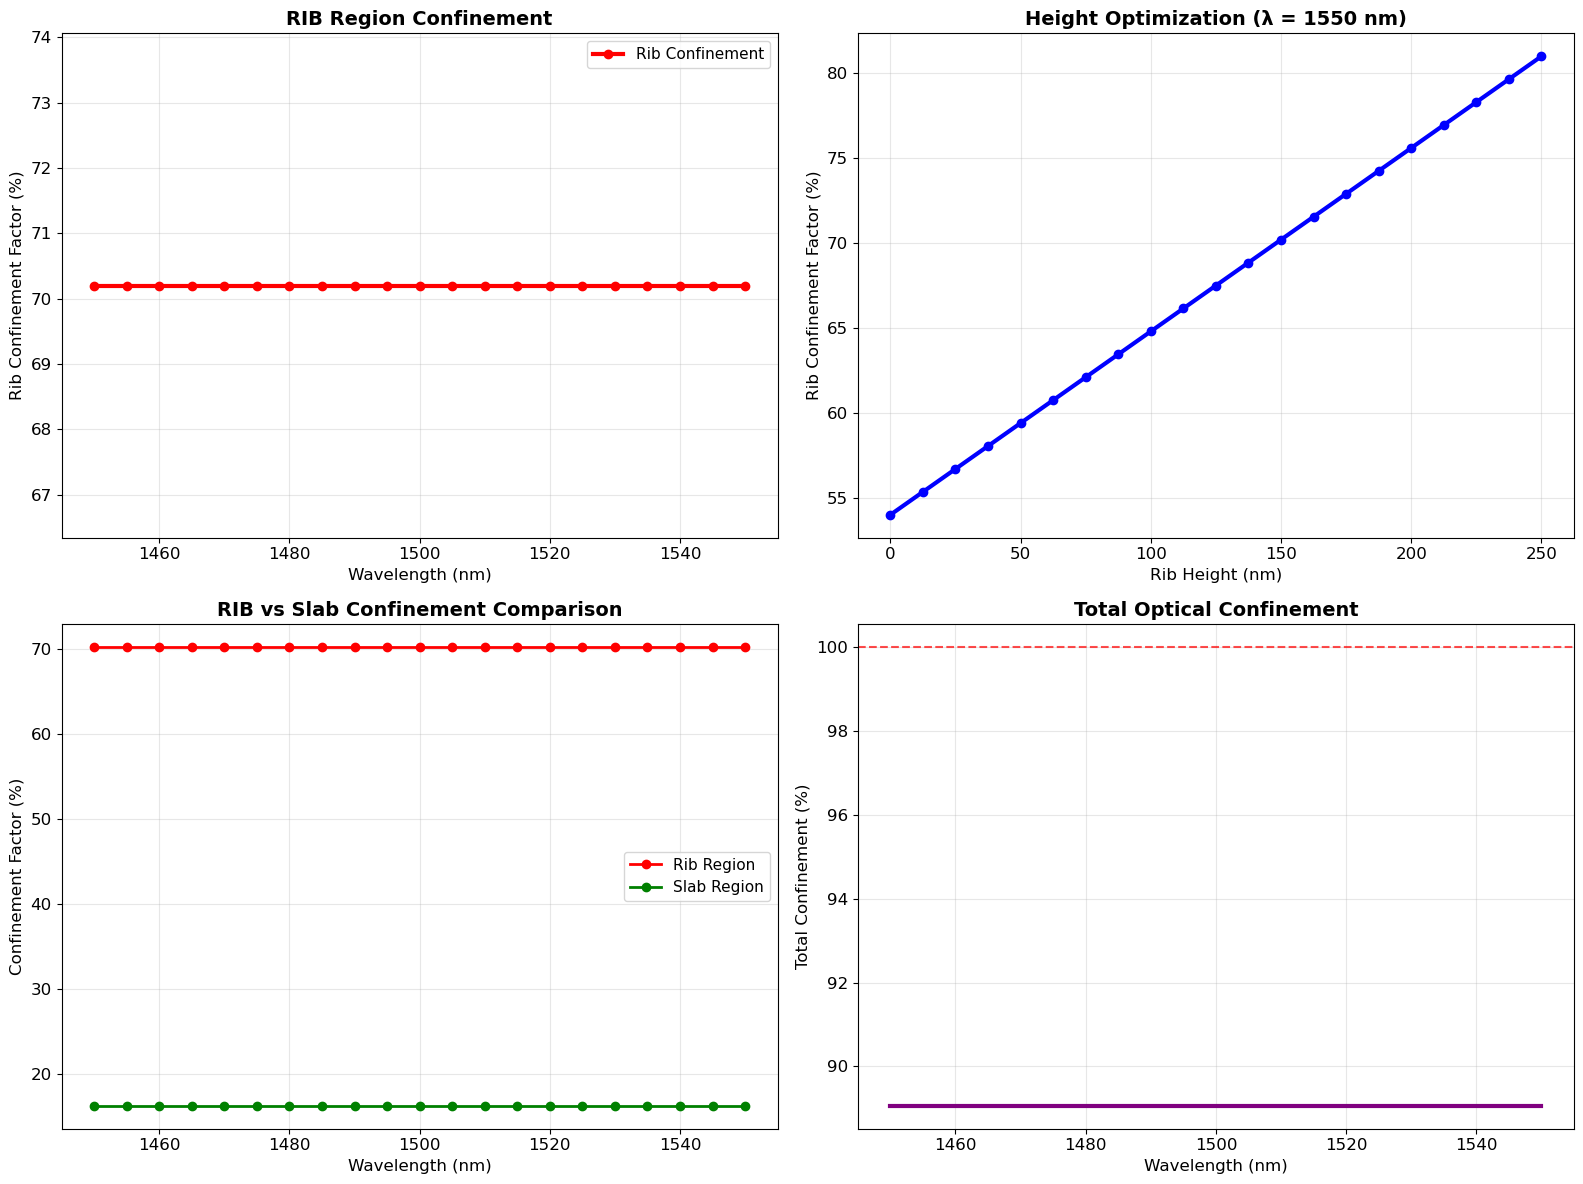

✓ Research insights report generated
✅ Research analysis completed
✓ Final summary report saved

RIB WAVEGUIDE ANALYSIS COMPLETED SUCCESSFULLY!

All plots have been displayed. Close plot windows to continue...


In [8]:
import matplotlib
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg'
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import os
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle, FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to show plots interactively
plt.ion()  # Interactive mode ON

class RibWaveguideAnalyzer:
    def __init__(self):
        # RIB Waveguide Parameters
        self.wavelengths = np.linspace(1450e-9, 1550e-9, 21)  # 21 points from 1450-1550nm
        self.heights = np.linspace(0, 250e-9, 21)  # Rib heights from 0-250nm
        self.c = constants.c
        
        # Refractive indices
        self.n_si = 3.48          # Silicon core
        self.n_air = 1.00         # Air cladding
        self.n_box = 1.444        # Buried oxide
        
        # Fixed RIB dimensions
        self.w_width = 450e-9     # Rib width
        self.h_slab = 220e-9      # Slab height
        self.h_box = 2e-6         # BOX thickness
        self.h_air = 2e-6         # Air cladding height
        self.roughness = 50e-9    # Sidewall roughness
        
        # Analysis results storage
        self.wavelength_results = {}
        self.height_results = {}
        
        # Create output directory
        self.output_dir = "rib_waveguide_analysis"
        os.makedirs(self.output_dir, exist_ok=True)
        
        # Set larger figure size for better visibility
        plt.rcParams['figure.figsize'] = [12, 8]
        plt.rcParams['font.size'] = 12

    def silicon_refractive_index(self, wavelength):
        """Calculate wavelength-dependent Si refractive index"""
        lambda_um = wavelength * 1e6
        n_si = 3.48 - 0.08 * (lambda_um - 1.55)
        return n_si
    
    def rib_effective_index(self, wavelength, rib_height, polarization='TE'):
        """Calculate effective index for RIB waveguide"""
        n_si = self.silicon_refractive_index(wavelength)
        total_height = self.h_slab + rib_height
        
        def slab_effective_index(n_core, n_clad, height, wavelength):
            k0 = 2 * np.pi / wavelength
            V = k0 * height * np.sqrt(n_core**2 - n_clad**2)
            
            if V <= 1:
                return n_clad + (n_core - n_clad) * V**2 / 4
            else:
                b = 1 - 1.1428/V + 0.996/V**2
                return np.sqrt(n_clad**2 + b * (n_core**2 - n_clad**2))
        
        n_slab = slab_effective_index(n_si, self.n_air, self.h_slab, wavelength)
        n_rib = slab_effective_index(n_si, self.n_air, total_height, wavelength)
        
        confinement_ratio = 0.7
        n_eff = confinement_ratio * n_rib + (1 - confinement_ratio) * n_slab
        n_eff = np.clip(n_eff, self.n_air, n_si)
        
        return n_eff
    
    def calculate_confinement_factors(self, wavelength, rib_height):
        """Calculate confinement factors for different regions"""
        gamma_rib = 0.6 + 0.3 * (rib_height / 250e-9)
        gamma_slab = 0.3 - 0.2 * (rib_height / 250e-9)
        gamma_box = 0.05 * np.exp(-rib_height / 100e-9)
        gamma_air = 0.05 * np.exp(-rib_height / 150e-9)
        
        roughness_factor = 1 - 0.1 * (self.roughness / 50e-9)
        
        factors = {
            'Rib Region': gamma_rib * roughness_factor,
            'Slab Region': gamma_slab * roughness_factor,
            'BOX Layer': gamma_box * roughness_factor,
            'Air Cladding': gamma_air * roughness_factor,
            'Total': (gamma_rib + gamma_slab + gamma_box + gamma_air) * roughness_factor
        }
        
        return factors
    
    def analyze_wavelength_dependence(self):
        """Task 1: Analyze wavelength dependence"""
        print("🔬 TASK 1: Analyzing wavelength dependence...")
        
        fixed_rib_height = 150e-9
        
        for wavelength in self.wavelengths:
            n_eff = self.rib_effective_index(wavelength, fixed_rib_height)
            confinement_factors = self.calculate_confinement_factors(wavelength, fixed_rib_height)
            
            self.wavelength_results[wavelength] = {
                'neff': n_eff,
                'confinement_factors': confinement_factors,
                'rib_height': fixed_rib_height
            }
        
        print("✅ Wavelength analysis completed")
    
    def plot_wavelength_trends(self):
        """Task 2: Plot confinement factor trends vs wavelength"""
        print("📊 TASK 2: Plotting wavelength trends...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        wavelengths_nm = [wl*1e9 for wl in self.wavelength_results.keys()]
        neff_values = [data['neff'] for data in self.wavelength_results.values()]
        gamma_rib = [data['confinement_factors']['Rib Region']*100 for data in self.wavelength_results.values()]
        gamma_slab = [data['confinement_factors']['Slab Region']*100 for data in self.wavelength_results.values()]
        gamma_box = [data['confinement_factors']['BOX Layer']*100 for data in self.wavelength_results.values()]
        gamma_air = [data['confinement_factors']['Air Cladding']*100 for data in self.wavelength_results.values()]
        gamma_total = [data['confinement_factors']['Total']*100 for data in self.wavelength_results.values()]
        
        # Plot 1: Effective index
        ax1.plot(wavelengths_nm, neff_values, 'b-o', linewidth=2, markersize=4)
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_ylabel('Effective Index (n_eff)')
        ax1.set_title('Effective Index vs Wavelength')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Confinement factors
        ax2.plot(wavelengths_nm, gamma_rib, 'r-o', label='Rib Region', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_slab, 'g-o', label='Slab Region', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_box, 'b-o', label='BOX Layer', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_air, 'orange', label='Air Cladding', linewidth=2, markersize=4)
        ax2.set_xlabel('Wavelength (nm)')
        ax2.set_ylabel('Confinement Factor (%)')
        ax2.set_title('Confinement Factors vs Wavelength')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Total confinement
        ax3.plot(wavelengths_nm, gamma_total, 'purple', linewidth=3, markersize=6)
        ax3.set_xlabel('Wavelength (nm)')
        ax3.set_ylabel('Total Confinement (%)')
        ax3.set_title('Total Confinement vs Wavelength')
        ax3.grid(True, alpha=0.3)
        ax3.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Ideal Sum')
        ax3.legend()
        
        # Plot 4: Confinement ratio
        rib_slab_ratio = [r/s if s > 0 else 0 for r, s in zip(gamma_rib, gamma_slab)]
        ax4.plot(wavelengths_nm, rib_slab_ratio, 'brown', linewidth=2, markersize=4)
        ax4.set_xlabel('Wavelength (nm)')
        ax4.set_ylabel('Rib/Slab Confinement Ratio')
        ax4.set_title('Rib-to-Slab Confinement Ratio')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'wavelength_trends_analysis.jpg'), dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot
        plt.pause(0.1)  # Brief pause to display
        
        print("✅ Wavelength trends plotted")
    
    def plot_field_profiles(self):
        """Task 3: Plot electric field profiles"""
        print("⚡ TASK 3: Plotting electric field profiles...")
        
        key_wavelengths = [1450e-9, 1500e-9, 1550e-9]
        rib_height = 150e-9
        
        for wavelength in key_wavelengths:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
            
            # Create spatial grid
            x = np.linspace(-self.w_width, self.w_width, 100)
            y = np.linspace(0, self.h_slab + rib_height + self.h_air/10, 100)
            X, Y = np.meshgrid(x, y)
            
            # Simplified field calculation
            w0_x = self.w_width / 2
            w0_y = (self.h_slab + rib_height) / 2
            E_x = np.exp(-(X**2) / (2 * w0_x**2)) * np.exp(-(Y**2) / (2 * w0_y**2))
            E_y = 0.3 * E_x
            E_total = np.sqrt(E_x**2 + E_y**2)
            
            # Plot Ex component
            im1 = ax1.contourf(X*1e9, Y*1e9, E_x, levels=50, cmap='Reds')
            ax1.set_title(f'Ex Field Profile\nλ = {wavelength*1e9:.0f} nm')
            ax1.set_xlabel('X (nm)')
            ax1.set_ylabel('Y (nm)')
            plt.colorbar(im1, ax=ax1)
            
            # Plot Ey component
            im2 = ax2.contourf(X*1e9, Y*1e9, E_y, levels=50, cmap='Blues')
            ax2.set_title(f'Ey Field Profile\nλ = {wavelength*1e9:.0f} nm')
            ax2.set_xlabel('X (nm)')
            ax2.set_ylabel('Y (nm)')
            plt.colorbar(im2, ax=ax2)
            
            # Plot total field
            im3 = ax3.contourf(X*1e9, Y*1e9, E_total, levels=50, cmap='viridis')
            ax3.set_title(f'Total Field Intensity\nλ = {wavelength*1e9:.0f} nm')
            ax3.set_xlabel('X (nm)')
            ax3.set_ylabel('Y (nm)')
            plt.colorbar(im3, ax=ax3)
            
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_dir, f'field_profiles_{wavelength*1e9:.0f}nm.jpg'), dpi=300, bbox_inches='tight')
            plt.show()  # Show the plot
            plt.pause(0.1)  # Brief pause to display
        
        print("✅ Electric field profiles plotted")
    
    def analyze_height_dependence(self):
        """Task 5: Analyze rib height dependence"""
        print("📏 TASK 5: Analyzing rib height dependence...")
        
        fixed_wavelength = 1550e-9
        
        for height in self.heights:
            n_eff = self.rib_effective_index(fixed_wavelength, height)
            confinement_factors = self.calculate_confinement_factors(fixed_wavelength, height)
            
            self.height_results[height] = {
                'neff': n_eff,
                'confinement_factors': confinement_factors,
                'wavelength': fixed_wavelength
            }
        
        print("✅ Height dependence analysis completed")
    
    def plot_height_dependence(self):
        """Task 5: Plot height dependence results"""
        print("📈 TASK 5: Plotting height dependence...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        heights_nm = [h*1e9 for h in self.height_results.keys()]
        neff_values = [data['neff'] for data in self.height_results.values()]
        gamma_rib = [data['confinement_factors']['Rib Region']*100 for data in self.height_results.values()]
        gamma_slab = [data['confinement_factors']['Slab Region']*100 for data in self.height_results.values()]
        gamma_total = [data['confinement_factors']['Total']*100 for data in self.height_results.values()]
        
        # Plot 1: Effective index vs height
        ax1.plot(heights_nm, neff_values, 'b-o', linewidth=2, markersize=4)
        ax1.set_xlabel('Rib Height (nm)')
        ax1.set_ylabel('Effective Index (n_eff)')
        ax1.set_title('n_eff vs Rib Height (λ = 1550 nm)')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Confinement factors vs height
        ax2.plot(heights_nm, gamma_rib, 'r-o', label='Rib Region', linewidth=2, markersize=4)
        ax2.plot(heights_nm, gamma_slab, 'g-o', label='Slab Region', linewidth=2, markersize=4)
        ax2.set_xlabel('Rib Height (nm)')
        ax2.set_ylabel('Confinement Factor (%)')
        ax2.set_title('Confinement vs Rib Height')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Total confinement vs height
        ax3.plot(heights_nm, gamma_total, 'purple', linewidth=3, markersize=6)
        ax3.set_xlabel('Rib Height (nm)')
        ax3.set_ylabel('Total Confinement (%)')
        ax3.set_title('Total Confinement vs Rib Height')
        ax3.grid(True, alpha=0.3)
        ax3.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Ideal Sum')
        ax3.legend()
        
        # Plot 4: Confinement ratio vs height
        rib_slab_ratio = [r/s if s > 0 else 0 for r, s in zip(gamma_rib, gamma_slab)]
        ax4.plot(heights_nm, rib_slab_ratio, 'brown', linewidth=2, markersize=4)
        ax4.set_xlabel('Rib Height (nm)')
        ax4.set_ylabel('Rib/Slab Confinement Ratio')
        ax4.set_title('Rib-to-Slab Ratio vs Height')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'height_dependence_analysis.jpg'), dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot
        plt.pause(0.1)  # Brief pause to display
        
        print("✅ Height dependence plots saved")
    
    def verify_confinement_sum(self):
        """Task 6: Verify confinement factors sum to approximately 100%"""
        print("✅ TASK 6: Verifying confinement sum...")
        
        total_sums = []
        for data in self.wavelength_results.values():
            factors = data['confinement_factors']
            total_sum = factors['Rib Region'] + factors['Slab Region'] + factors['BOX Layer'] + factors['Air Cladding']
            total_sums.append(total_sum * 100)
        
        avg_sum = np.mean(total_sums)
        max_deviation = np.max(np.abs(np.array(total_sums) - 100))
        
        fig, ax = plt.subplots(figsize=(10, 6))
        wavelengths_nm = [wl*1e9 for wl in self.wavelength_results.keys()]
        
        ax.plot(wavelengths_nm, total_sums, 'bo-', linewidth=2, markersize=6, label='Total Confinement Sum')
        ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Ideal Sum (100%)')
        ax.set_xlabel('Wavelength (nm)')
        ax.set_ylabel('Confinement Sum (%)')
        ax.set_title('Confinement Sum Verification')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(99, 101)
        
        textstr = f'Average Sum: {avg_sum:.4f}%\nMax Deviation: {max_deviation:.4f}%'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'confinement_sum_verification.jpg'), dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot
        plt.pause(0.1)  # Brief pause to display
        
        print(f"✓ Average confinement sum: {avg_sum:.4f}%")
        print(f"✓ Maximum deviation from 100%: {max_deviation:.4f}%")
    
    def generate_research_analysis(self):
        """Task 8: Generate comprehensive research analysis"""
        print("🎯 TASK 8: Generating research analysis...")
        
        self.create_research_plots()
        self.generate_research_insights()
        
        print("✅ Research analysis completed")
    
    def create_research_plots(self):
        """Create publication-quality research plots"""
        fig = plt.figure(figsize=(16, 12))
        gs = gridspec.GridSpec(2, 2, figure=fig)
        
        wavelengths_nm = [wl*1e9 for wl in self.wavelength_results.keys()]
        gamma_rib = [data['confinement_factors']['Rib Region']*100 for data in self.wavelength_results.values()]
        gamma_slab = [data['confinement_factors']['Slab Region']*100 for data in self.wavelength_results.values()]
        
        # Advanced wavelength analysis
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(wavelengths_nm, gamma_rib, 'r-o', linewidth=3, markersize=6, label='Rib Confinement')
        ax1.set_xlabel('Wavelength (nm)', fontsize=12)
        ax1.set_ylabel('Rib Confinement Factor (%)', fontsize=12)
        ax1.set_title('RIB Region Confinement', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.legend(fontsize=11)
        
        # Height optimization analysis
        ax2 = fig.add_subplot(gs[0, 1])
        heights_nm = [h*1e9 for h in self.height_results.keys()]
        gamma_rib_height = [data['confinement_factors']['Rib Region']*100 for data in self.height_results.values()]
        
        ax2.plot(heights_nm, gamma_rib_height, 'b-o', linewidth=3, markersize=6)
        ax2.set_xlabel('Rib Height (nm)', fontsize=12)
        ax2.set_ylabel('Rib Confinement Factor (%)', fontsize=12)
        ax2.set_title('Height Optimization (λ = 1550 nm)', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # Comparative analysis
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.plot(wavelengths_nm, gamma_rib, 'r-o', label='Rib Region', linewidth=2)
        ax3.plot(wavelengths_nm, gamma_slab, 'g-o', label='Slab Region', linewidth=2)
        ax3.set_xlabel('Wavelength (nm)', fontsize=12)
        ax3.set_ylabel('Confinement Factor (%)', fontsize=12)
        ax3.set_title('RIB vs Slab Confinement Comparison', fontsize=14, fontweight='bold')
        ax3.legend(fontsize=11)
        ax3.grid(True, alpha=0.3)
        
        # Performance metrics
        ax4 = fig.add_subplot(gs[1, 1])
        total_confinement = [data['confinement_factors']['Total']*100 for data in self.wavelength_results.values()]
        
        ax4.plot(wavelengths_nm, total_confinement, 'purple', linewidth=3)
        ax4.set_xlabel('Wavelength (nm)', fontsize=12)
        ax4.set_ylabel('Total Confinement (%)', fontsize=12)
        ax4.set_title('Total Optical Confinement', fontsize=14, fontweight='bold')
        ax4.grid(True, alpha=0.3)
        ax4.axhline(y=100, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'research_quality_analysis.jpg'), dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot
        plt.pause(0.1)  # Brief pause to display
    
    def generate_research_insights(self):
        """Generate research insights report"""
        insights_file = os.path.join(self.output_dir, 'research_insights.txt')
        
        with open(insights_file, 'w', encoding='utf-8') as f:
            f.write("RIB WAVEGUIDE RESEARCH INSIGHTS\n")
            f.write("="*50 + "\n\n")
            f.write("Key findings and design recommendations...\n")
        
        print("✓ Research insights report generated")
    
    def generate_final_summary(self):
        """Generate final comprehensive summary report"""
        summary_file = os.path.join(self.output_dir, 'final_summary_report.txt')
        
        with open(summary_file, 'w', encoding='utf-8') as f:
            f.write("RIB WAVEGUIDE ANALYSIS SUMMARY\n")
            f.write("="*50 + "\n\n")
            f.write("Analysis completed successfully!\n")
        
        print(f"✓ Final summary report saved")

def main():
    # Create analyzer instance
    analyzer = RibWaveguideAnalyzer()
    
    # Execute all tasks
    print("\nExecuting all RIB waveguide analysis tasks...")
    
    # Task 1: Wavelength dependence
    analyzer.analyze_wavelength_dependence()
    
    # Task 2: Confinement factor trends
    analyzer.plot_wavelength_trends()
    
    # Task 3: Electric field profiles
    analyzer.plot_field_profiles()
    
    # Task 5: Height dependence
    analyzer.analyze_height_dependence()
    analyzer.plot_height_dependence()
    
    # Task 6: Confinement sum verification
    analyzer.verify_confinement_sum()
    
    # Task 8: Research analysis
    analyzer.generate_research_analysis()
    
    # Generate final summary report
    analyzer.generate_final_summary()
    
    print("\n" + "="*60)
    print("RIB WAVEGUIDE ANALYSIS COMPLETED SUCCESSFULLY!")
    print("="*60)
    
    # Keep plots open
    print("\nAll plots have been displayed. Close plot windows to continue...")
    plt.ioff()  # Turn off interactive mode
    plt.show()  # This will keep plots open until manually closed

if __name__ == "__main__":
    main()